In [530]:
import pandas as pd

In [532]:
import numpy as np

In [534]:
import matplotlib.pyplot as plt

In [536]:
invoices = pd.read_csv('/Users/juliancheng/Downloads/fct_invoice.csv')

In [537]:
import json

In [540]:
with open('/Users/juliancheng/Downloads/dim_customer.json') as f:
    data = json.load(f)

In [542]:
customers = pd.DataFrame(data)

In [544]:
customers.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


# EASY

In [546]:
# How many unique customers are in the dataset?
customers['id'].nunique()

5191

In [619]:
# What are the different categories of products available? How many unique categories are there?
print('the different categories are',
      ','.join(list(invoices['category'].unique())),
      'therefore there are',
      str(invoices['category'].nunique()),
      'unique categories'
     )

the different categories are Clothing,Shoes,Books,Cosmetics,Food & Beverage,Toys,Technology,Souvenir therefore there are 8 unique categories


In [595]:
# Which payment method is the most popular? How many times was it used?
invoices.groupby('payment_method').count()['invoice_no'].sort_values(ascending = False).head(1)

payment_method
Cash    44447
Name: invoice_no, dtype: int64

# MEDIUM

In [552]:
# What are the three most popular categories, by total sales?
invoices['sale_price'] = invoices['quantity'] * invoices['price']
bob = invoices.groupby('category').sum()['sale_price']
pd.DataFrame(bob).sort_values('sale_price', ascending = False)[:3]

,sale_price
category,
Clothing,1.139968e+08
Shoes,6.655345e+07
Technology,5.786235e+07


In [553]:
# What are the total sales attributed to customers over the age of 45?
invoices[invoices['customer_id'].isin(customers[customers['age'] > 45]['id'])]['sale_price'].sum()

82039768.15

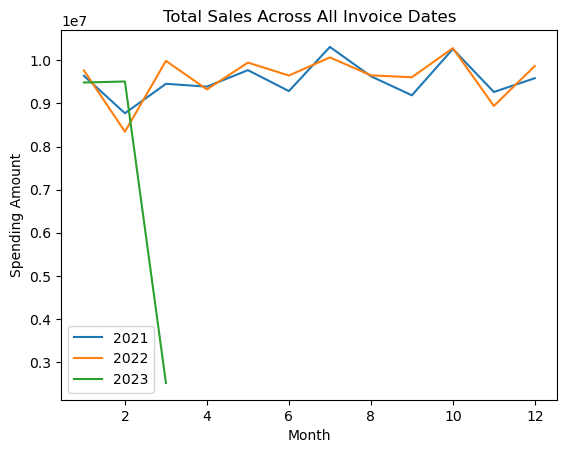

In [554]:
# How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

merged = pd.merge(invoices,customers,how = "left", left_on = "customer_id", right_on = "id")
merged["invoice_date"] = pd.to_datetime(merged["invoice_date"], dayfirst = True)
merged["month"] = merged["invoice_date"].dt.month
merged["year"] = merged["invoice_date"].dt.year

# I tried letting the x-axis include the day of the individual invoices but it became unreadable, so i just categorized by month

jeff = merged.groupby(["year", "month"])["sale_price"].sum()
newer = pd.DataFrame(jeff)
newer.reset_index(inplace = True)
plt.figure()

for yr in [2021,2022,2023]:
    plt.plot(newer[newer["year"] == yr]["month"], newer[newer["year"] == yr]["sale_price"], label = yr)
    plt.xlabel("Month")
    plt.ylabel("Spending Amount")
    plt.title("Total Sales Across All Invoice Dates")
    plt.legend()

plt.show()

# HARD

In [584]:
# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
def age(x):
    if (x >= 10) and (x <= 19):
        return '10-19'
    if (x >= 20) and (x <= 29):
        return '20-29'
    if (x >= 30) and (x <= 39):
        return '30-39'
    if (x >= 40) and (x <= 49):
        return '40-49'
    if (x >= 50) and (x <= 59):
        return '50-59'
    if (x >= 60) and (x <= 69):
        return '60-69'
    if (x >= 70) and (x <= 79):
        return '70-79'
    if (x >= 80) and (x <= 89):
        return '80-89'
    if (x >= 90) and (x <= 99):
        return '90-99'
    else:
        return 'Not Specified'

merged['age_range'] = merged['age'].apply(age)
pd.pivot_table(merged, values = 'sale_price', index = 'category', columns = 'age_range', aggfunc = 'sum', fill_value = 0)

age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,Not Specified
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
